Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [182]:
# imports!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
# what do we replicate?
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)
example

In [184]:
# find 538 style
print(plt.style.available)
plt.style.use('fivethirtyeight')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [185]:
# make a list of fake data 
list = [38, 3, 2, 1, 3, 4, 6, 5, 5, 34]
fake = pd.Series(list, index=range(1,11))
fake

1     38
2      3
3      2
4      1
5      3
6      4
7      6
8      5
9      5
10    34
dtype: int64

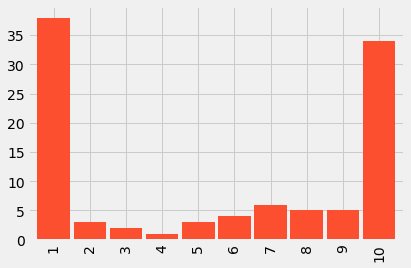

In [186]:
# plot fake data 
fake.plot.bar(color='C1', width = 0.9 );

In [187]:
# compare
display(example)

In [188]:
# make another fakel list
list2=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,  1, 1, 1, 
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


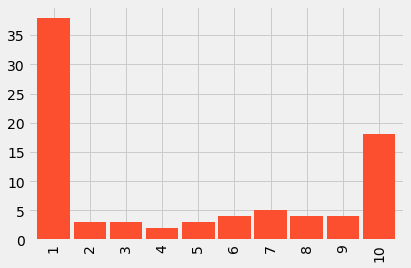

In [189]:
# plot this one
fake2 = pd.Series(list2)
fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

In [190]:
# display data
display(example)

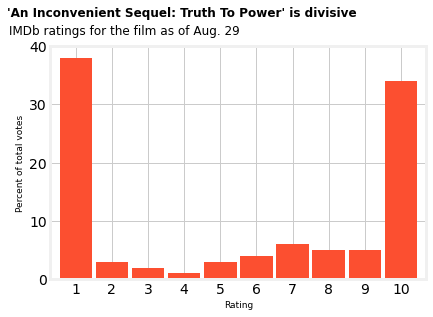

In [191]:
# style preset
fig, axes = plt.subplots()
fig.patch.set(facecolor='white')

#set bar color and width
fake.plot.bar(width=0.9, color='C1')

axes.set(facecolor='white')

#set title and subtitle
axes.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize=12, 
             x=.35, 
             y=1.1,
             fontweight='bold')
axes.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42);

# set x- and y-axes labels
axes.set_xlabel("Rating", fontsize=9)
axes.set_ylabel("Percent of total votes", fontsize=9);

# fix x and y tickmarks and grid
axes.set_xticklabels(range(1,11), rotation=0)
axes.set_yticklabels(range(0,50,10))
axes.set_yticks(range(0,50,10));

In [192]:
# now with the real data
# read the data from 538's github repo
films = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')
films.tail()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
80048,2017-08-29 23:10:05.369510,8,IMDb staff,http://www.imdb.com/title/tt6322922/ratings-im...,8.4,7.2,8,1,0,0,0,0,1,1,2,2,1,12.5,0.0,0.0,0.0,0.0,12.5,12.5,25.0,25.0,12.5
80049,2017-08-29 23:10:05.598331,41,Top 1000 voters,http://www.imdb.com/title/tt6322922/ratings-to...,4.6,4.7,5,11,4,2,2,5,4,5,1,1,6,26.8,9.8,4.9,4.9,12.2,9.8,12.2,2.4,2.4,14.6
80050,2017-08-29 23:10:05.794141,925,US users,http://www.imdb.com/title/tt6322922/ratings-usa,4.8,5.0,4,405,34,20,8,9,30,54,46,60,259,43.8,3.7,2.2,0.9,1.0,3.2,5.8,5.0,6.5,28.0
80051,2017-08-29 23:10:06.022268,565,Non-US users,http://www.imdb.com/title/tt6322922/ratings-in...,6.4,6.5,7,129,11,10,8,32,47,52,37,35,204,22.8,1.9,1.8,1.4,5.7,8.3,9.2,6.5,6.2,36.1
80052,2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [193]:
# change tipe of data 
print(films['timestamp'].dtype)
films['timestamp'] = pd.to_datetime(films['timestamp'])
print(films['timestamp'].dtype)

object
datetime64[ns]


In [194]:
# set index to be date time format
films.set_index('timestamp', inplace=True)

In [195]:
# we are interested in the last day's respondents
last_day = films['2017-08-29']
last_day.tail()


,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 23:10:05.369510,8,IMDb staff,http://www.imdb.com/title/tt6322922/ratings-im...,8.4,7.2,8,1,0,0,0,0,1,1,2,2,1,12.5,0.0,0.0,0.0,0.0,12.5,12.5,25.0,25.0,12.5
2017-08-29 23:10:05.598331,41,Top 1000 voters,http://www.imdb.com/title/tt6322922/ratings-to...,4.6,4.7,5,11,4,2,2,5,4,5,1,1,6,26.8,9.8,4.9,4.9,12.2,9.8,12.2,2.4,2.4,14.6
2017-08-29 23:10:05.794141,925,US users,http://www.imdb.com/title/tt6322922/ratings-usa,4.8,5.0,4,405,34,20,8,9,30,54,46,60,259,43.8,3.7,2.2,0.9,1.0,3.2,5.8,5.0,6.5,28.0
2017-08-29 23:10:06.022268,565,Non-US users,http://www.imdb.com/title/tt6322922/ratings-in...,6.4,6.5,7,129,11,10,8,32,47,52,37,35,204,22.8,1.9,1.8,1.4,5.7,8.3,9.2,6.5,6.2,36.1
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [196]:
# we filter respondents from the last day just to the ones we need
last_day_filtered = last_day[last_day['category'] == 'IMDb users'].copy()
print(last_day.shape)
last_day_filtered.shape

(2660, 26)


(140, 26)

In [197]:
# get last line 
final = last_day_filtered.tail(1)
final.T

timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38
4_votes,25


In [198]:
final.T.tail(10)

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [199]:
# clean up a lil bit
plot_data = final.T.tail(10)
plot_data.index = range(1,11)
plot_data.columns=['percent']
plot_data

,percent
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


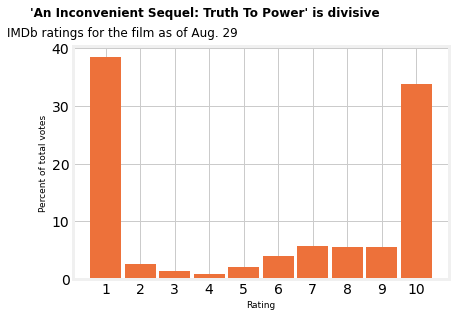

In [200]:
#build plot

fig, ax = plt.subplots()

# Figure background color
fig.patch.set(facecolor="white")

# Set the bars
ax.bar(x=range(1,11), height=plot_data['percent'], width=0.9, color="#ED713A")

# Axes background color
ax.set(facecolor="white")

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize=12, 
             x=.35, 
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42)

# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

# Fix the x an y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_xticks(range(1,11))
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));

In [201]:
display(example)

In [202]:
# now with some other data 

url1 = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/births/US_births_1994-2003_CDC_NCHS.csv'
url2 = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/births/US_births_2000-2014_SSA.csv'

births_1994 = pd.read_csv(url1)
births_2000 = pd.read_csv(url2)

In [203]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2016/05/bialik-fridaythe13th-2.png?w=1150'
example = Image(url=url, width=400)

display(example)

In [204]:
# look at the 1st piece of data
print(births_1994.shape)
births_1994.head()

(3652, 5)


,year,month,date_of_month,day_of_week,births
0,1994,1,1,6,8096
1,1994,1,2,7,7772
2,1994,1,3,1,10142
3,1994,1,4,2,11248
4,1994,1,5,3,11053


In [205]:
# look at the 2nd piece of data
print(births_2000.shape)
births_2000.head()

(5479, 5)


,year,month,date_of_month,day_of_week,births
0,2000,1,1,6,9083
1,2000,1,2,7,8006
2,2000,1,3,1,11363
3,2000,1,4,2,13032
4,2000,1,5,3,12558


In [206]:
# lets put two together 
total_births = pd.concat([births_1994, births_2000], axis=0)
total_births.shape

(9131, 5)

In [207]:
# lets cut off needn't column 
total_births = total_births[['date_of_month', 'day_of_week', 'births']].copy()
print(total_births.shape)
total_births.head()

(9131, 3)


,date_of_month,day_of_week,births
0,1,6,8096
1,2,7,7772
2,3,1,10142
3,4,2,11248
4,5,3,11053


In [208]:
# now we need to sum avarage of births on the 6th and 20th
# first look at the births on the 6th
total_births_6 = total_births[total_births['date_of_month'] == 6].copy()
print(total_births_6.shape)
total_births_6.sample(5)

(300, 3)


,date_of_month,day_of_week,births
2378,6,4,15007
1832,6,4,12733
1557,6,2,13122
5088,6,5,11861
1679,6,5,12935


In [209]:
# make a list of their sums 
list_births_6=[]
for i in range(1,8):
  amount = total_births_6.loc[total_births_6['day_of_week'] == i, 'births'].sum()
  list_births_6.append(amount)
print(list_births_6)

[466141, 531450, 534287, 593536, 510040, 370767, 335982]


In [210]:
# first look at the births on the 20th
total_births_20 = total_births[total_births['date_of_month'] == 20].copy()
print(total_births_20.shape)
total_births_20.sample(5)

(300, 3)


,date_of_month,day_of_week,births
565,20,4,12598
2241,20,7,7763
3093,20,5,13403
3000,20,3,12278
3853,20,2,13291


In [211]:
# make a list of their sums 
list_births_20=[]
for i in range(1,8):
  amount = total_births_20.loc[total_births_20['day_of_week'] == i, 'births'].sum()
  list_births_20.append(amount)
print(list_births_20)

[488763, 549653, 538761, 601497, 519837, 373561, 335996]


In [212]:
# count average 
average_6_20 = []
for i in range(0,7):
  ave = (list_births_6[i] + list_births_20[i])/2
  average_6_20.append(ave)
average_6_20


[477452.0, 540551.5, 536524.0, 597516.5, 514938.5, 372164.0, 335989.0]

In [213]:
total_births_13 = total_births[total_births['date_of_month'] == 13].copy()
print(total_births_13.shape)
total_births_13.sample(5)

(300, 3)


,date_of_month,day_of_week,births
4608,13,1,12126
2355,13,2,12416
437,13,2,12534
1959,13,5,11803
2081,13,1,11481


In [214]:
list_births_13=[]
for i in range(1,8):
  amount = total_births_13.loc[total_births_13['day_of_week'] == i, 'births'].sum()
  list_births_13.append(amount)
print(list_births_13)

[467145, 529185, 520564, 577179, 481226, 369792, 332657]


In [215]:
share_diff=[]
for i in range(0,7):
  share = (list_births_13[i] / average_6_20[i] - 1) * 100
  share_diff.append(share)
print(share_diff)

[-2.158751036753437, -2.102759866543702, -2.974703834311232, -3.4036716977690173, -6.546898318925464, -0.6373534248342083, -0.9916991330073288]


In [240]:
share_diff = pd.Series(share_diff)
share_diff.index = ['MON', 'TUES', 'WED', 'THUR', 'FRI', 'SAT', 'SUN']
share_diff.reset_index()

,index,0
0,MON,-2.158751
1,TUES,-2.102760
2,WED,-2.974704
3,THUR,-3.403672
4,FRI,-6.546898
5,SAT,-0.637353
6,SUN,-0.991699


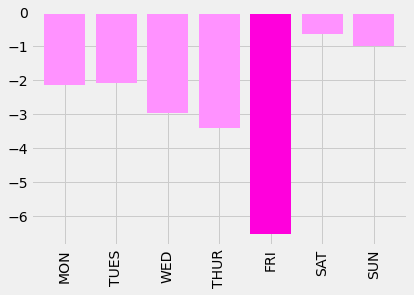

In [254]:
#build plot
share_diff.plot.bar(color= ["#FF92FF", "#FF92FF", "#FF92FF", "#FF92FF", '#FF00DC', "#FF92FF", "#FF92FF"], width = 0.8);


In [255]:
display(example)

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [ ]:
# More Work Here
